## 1. Carregando bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from decimal import Decimal
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## 2. Importando a base de dados e entendo os dados:

In [62]:
df          = pd.read_csv("pima-indians-diabetes.data.csv")
df['index'] = df.index

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Class                       768 non-null int64
index                       768 non-null int64
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


## 3. Entender a concentração/dispersão dos dados

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00
index,768.0,383.500000,221.846794,0.000,191.75000,383.5000,575.25000,767.00


## Analisar percentual de dados faltantes

In [9]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percentual = round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)
    return pd.concat([total, percentual], axis=1, keys=['Total','Percentual'])

In [10]:
missing_data(df)

,Total,Percentual
index,0,0.0
Class,0,0.0
Age,0,0.0
DiabetesPedigreeFunction,0,0.0
BMI,0,0.0
Insulin,0,0.0
SkinThickness,0,0.0
BloodPressure,0,0.0
Glucose,0,0.0
Pregnancies,0,0.0


## Analisar percentual de valores iguais a zero

In [64]:
def zero_entries(df):
    total = df.isin([0]).sum().sort_values(ascending = False)
    percentual = round(df.isin([0]).sum().sort_values(ascending = False) / len(df) * 100, 2)
    return pd.concat([total, percentual], axis=1, keys=['Total','Percentual'])

In [12]:
zero_entries(df)

,Total,Percentual
Class,500,65.10
Insulin,374,48.70
SkinThickness,227,29.56
Pregnancies,111,14.45
BloodPressure,35,4.56
BMI,11,1.43
Glucose,5,0.65
index,1,0.13
Age,0,0.00
DiabetesPedigreeFunction,0,0.00


## Histogramas

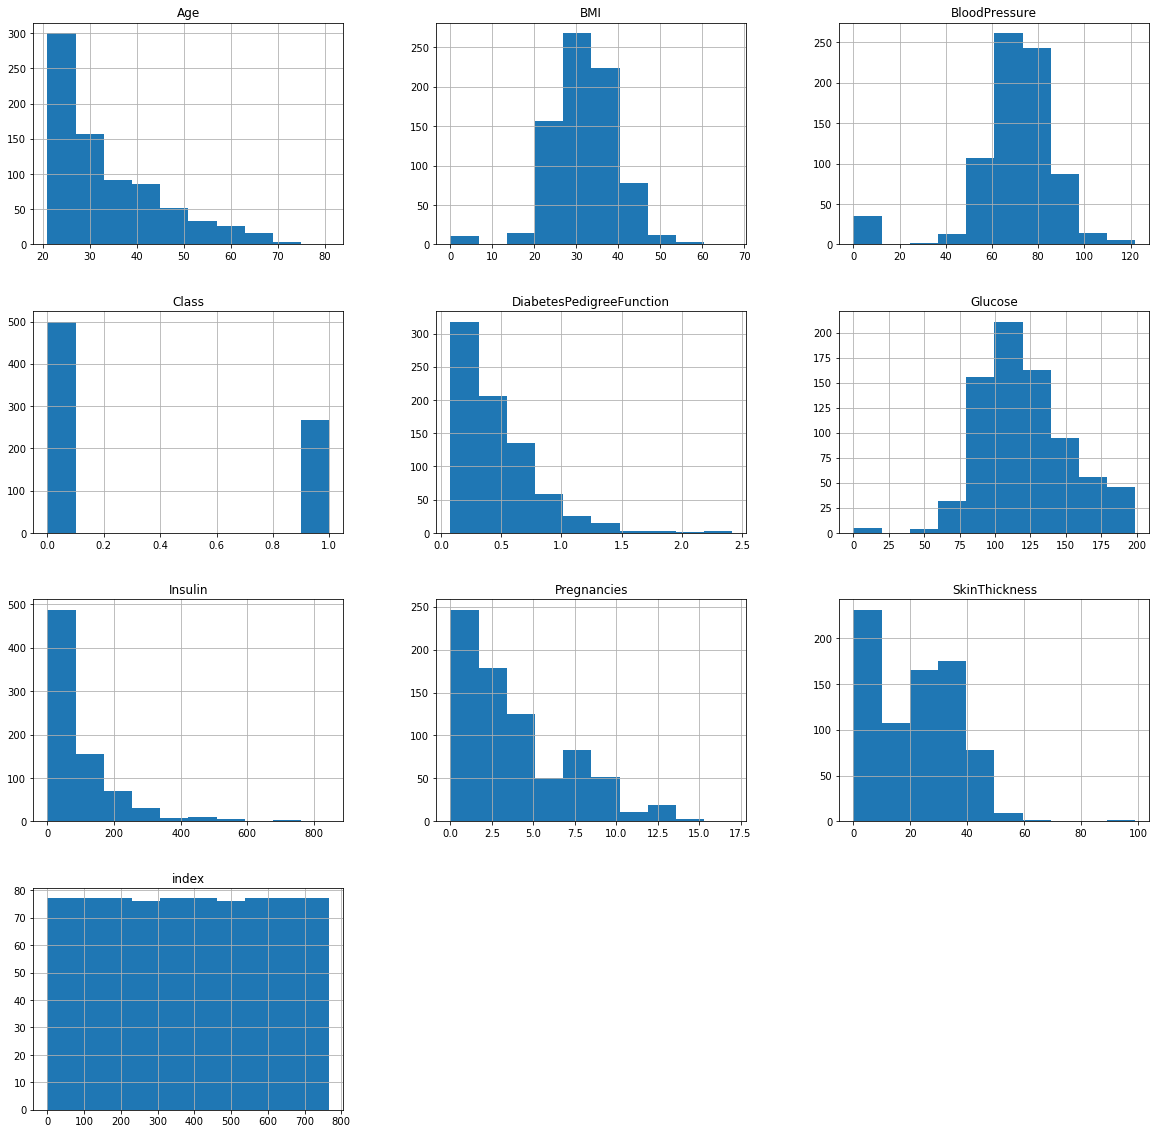

In [16]:
p = df.hist(figsize = (20,20))

### Plot para melhor compreensão dos dados:

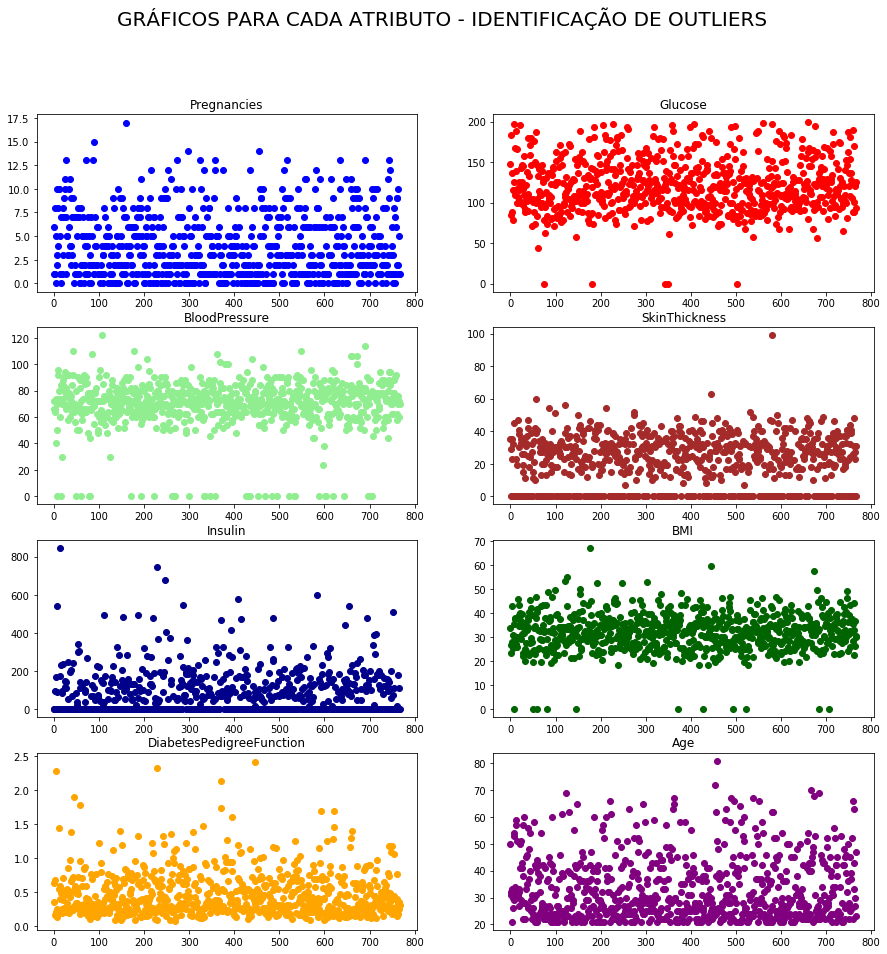

In [42]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
fig.suptitle("GRÁFICOS PARA CADA ATRIBUTO - IDENTIFICAÇÃO DE OUTLIERS", fontsize=20)

ax[0, 0].scatter(df['index'], df["Pregnancies"],              color = "blue")
ax[0, 0].set_title("Pregnancies")
ax[0, 1].scatter(df['index'], df["Glucose"],                  color = "red")
ax[0, 1].set_title("Glucose")
ax[1, 0].scatter(df['index'], df["BloodPressure"],            color = "lightgreen")
ax[1, 0].set_title("BloodPressure")
ax[1, 1].scatter(df['index'], df["SkinThickness"],            color = "brown")
ax[1, 1].set_title("SkinThickness")
ax[2, 0].scatter(df['index'], df["Insulin"],                  color = "darkblue")
ax[2, 0].set_title("Insulin")
ax[2, 1].scatter(df['index'], df["BMI"],                      color = "darkgreen")
ax[2, 1].set_title("BMI")
ax[3, 0].scatter(df['index'], df["DiabetesPedigreeFunction"], color = "orange")
ax[3, 0].set_title("DiabetesPedigreeFunction")
ax[3, 1].scatter(df['index'], df["Age"],                      color = "purple")
ax[3, 1].set_title("Age")

plt.show()

### A partir do gráfico foram identificados valores discrepantes/incoerentes:

1. `Glucose` = 0
1. `BloodPressure` = 0
1. `SkinThickness` = 0
1. `Insulin` = 0
1. `BMI` = 0

## Separação da base de dados em pacientes com diabetes e sem diabetes (Sugestão do Lucas), para depois substituir os dados faltantes pela média/mediana das características de pacientes com características similares:

In [166]:
df0 = df.drop(['index'], axis=1)
df1 = df.drop(['index'], axis=1)
print(df0)

df0.drop(df0[(df0['Class'] == 1)].index, axis=0, inplace=True)
df1.drop(df1[(df1['Class'] == 0)].index, axis=0, inplace=True)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Class  
0                       0.627   50      1  
1                      

### Substituição dos valores iguais a zero pela média ou mediana. O critério para adotar uma ou outra foi o seguinte:

1. `Mediana` => Quando há muitos outliers a mediana tende a reduzir a influência dos mesmos.
1. `Média`   => Usada quando não há outliers e os dados estão mais concisos.

In [168]:
##############  Substituição de ZEROS na Tabela com pacientes sem diabetes  #################

df0['Glucose'].replace(0, dfn['Glucose'].mean(), inplace = True)
df0['BloodPressure'].replace(0, dfn['BloodPressure'].mean(), inplace = True)
df0['SkinThickness'].replace(0, dfn['SkinThickness'].median(), inplace = True)
df0['Insulin'].replace(0, dfn['Insulin'].median(), inplace = True)
df0['BMI'].replace(0, dfn['BMI'].median(), inplace = True)

df0.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,500.0,3.298000,3.017185,0.000,1.00000,2.000,5.00000,13.000
Glucose,500.0,110.710090,24.717047,44.000,93.00000,107.500,125.00000,197.000
BloodPressure,500.0,70.929683,11.930363,24.000,63.50000,72.000,78.00000,122.000
SkinThickness,500.0,26.058000,8.725532,7.000,22.00000,23.000,31.00000,60.000
Insulin,500.0,83.542000,89.357581,15.000,31.25000,39.000,105.00000,744.000
BMI,500.0,30.880200,6.503074,18.200,25.75000,30.400,35.30000,57.300
DiabetesPedigreeFunction,500.0,0.429734,0.299085,0.078,0.22975,0.336,0.56175,2.329
Age,500.0,31.190000,11.667655,21.000,23.00000,27.000,37.00000,81.000
Class,500.0,0.000000,0.000000,0.000,0.00000,0.000,0.00000,0.000


In [169]:
##############  Substituição de ZEROS na Tabela com pacientes COM diabetes  #################

df1['Glucose'].replace(0, dfn['Glucose'].mean(), inplace = True)
df1['BloodPressure'].replace(0, dfn['BloodPressure'].mean(), inplace = True)
df1['SkinThickness'].replace(0, dfn['SkinThickness'].median(), inplace = True)
df1['Insulin'].replace(0, dfn['Insulin'].median(), inplace = True)
df1['BMI'].replace(0, dfn['BMI'].median(), inplace = True)

df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,268.0,4.865672,3.741239,0.000,1.7500,4.000,8.000,17.00
Glucose,268.0,142.165534,29.541777,78.000,119.0000,140.000,167.000,199.00
BloodPressure,268.0,75.138347,11.947834,30.000,68.0000,74.000,82.000,114.00
SkinThickness,268.0,29.716418,9.676886,7.000,23.0000,27.000,36.000,99.00
Insulin,268.0,116.427239,127.429685,14.000,31.2500,31.250,167.250,846.00
BMI,268.0,35.381343,6.596704,22.900,30.9000,34.250,38.775,67.10
DiabetesPedigreeFunction,268.0,0.550500,0.372354,0.088,0.2625,0.449,0.728,2.42
Age,268.0,37.067164,10.968254,21.000,28.0000,36.000,44.000,70.00
Class,268.0,1.000000,0.000000,1.000,1.0000,1.000,1.000,1.00


In [177]:
##################  CONCATENANDO AS DUAS DATAFRAMES   ###############

frames = [df0, df1]

dfn = pd.concat(frames)
dfn.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686729,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.398331,12.096387,24.000,64.00000,72.127403,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.000000,32.00000,99.00
Insulin,768.0,95.017578,105.325751,14.000,31.25000,31.625000,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


### Histograma após substituição dos dados iguais a 0:

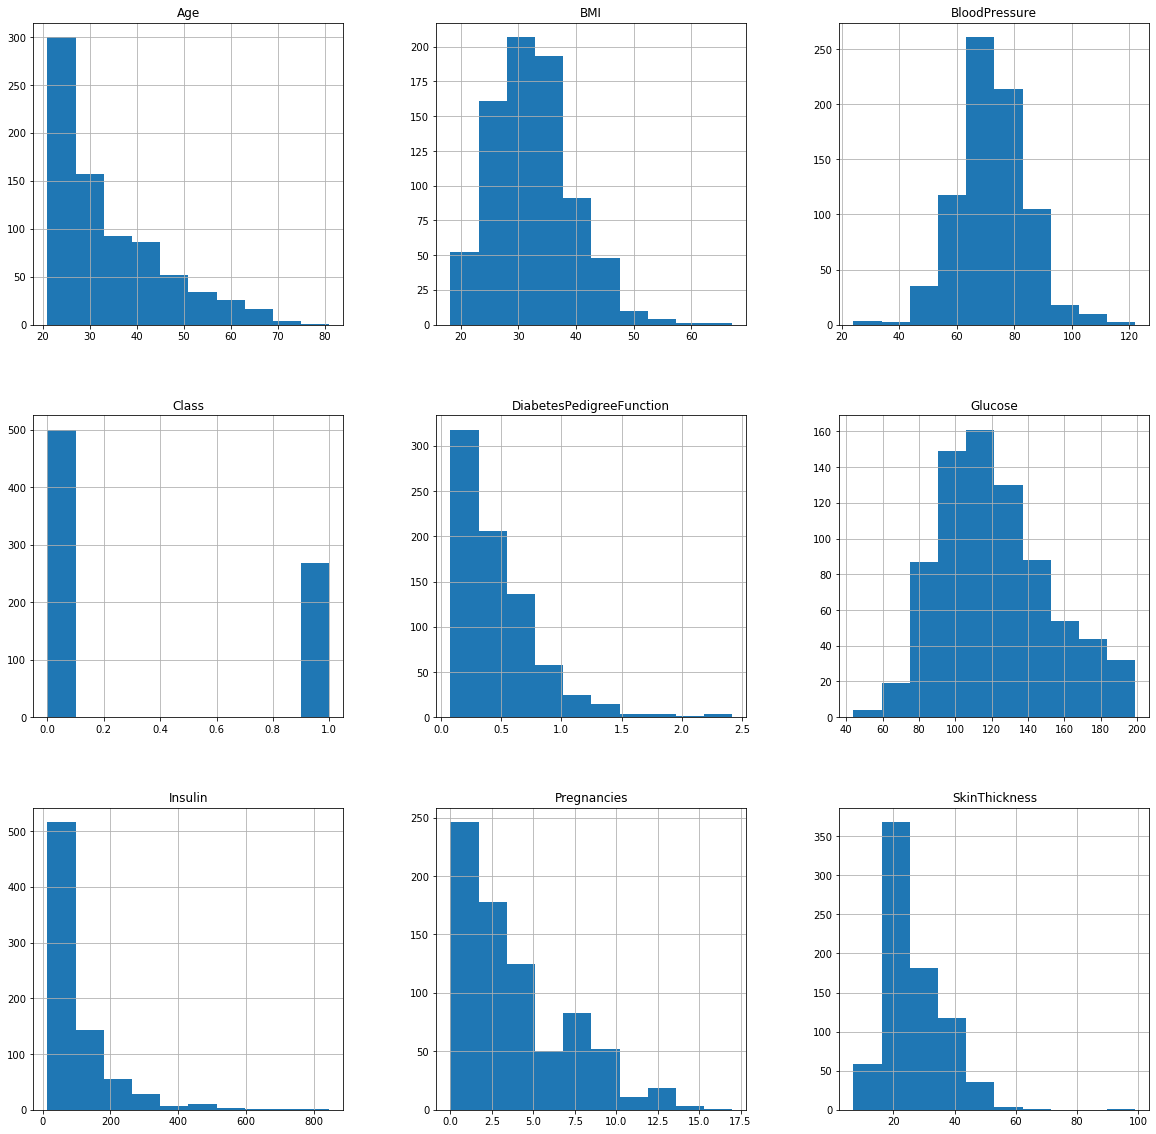

In [178]:
p = dfn.hist(figsize = (20,20))

## Comparativo de dados faltantes antes e depois

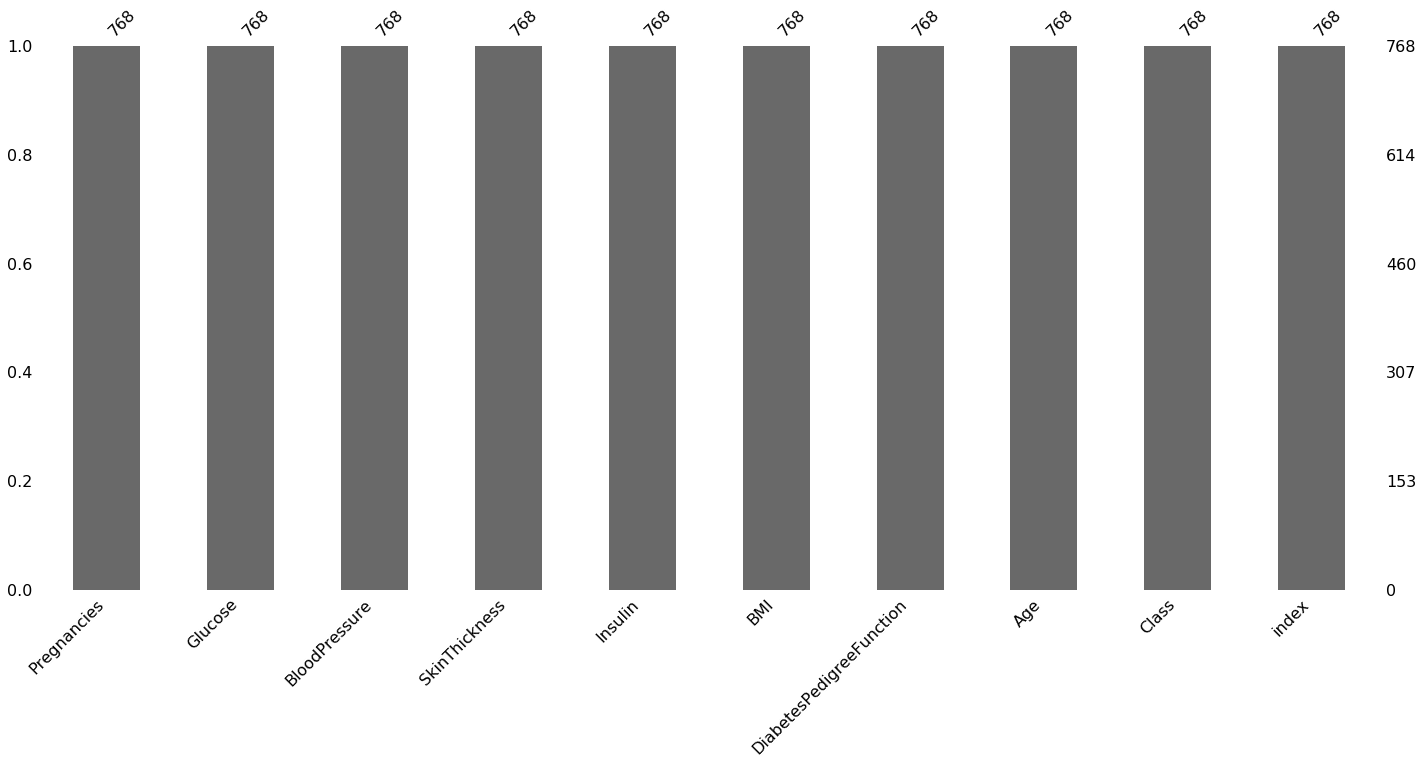

In [180]:
import missingno as msno
p=msno.bar(df)

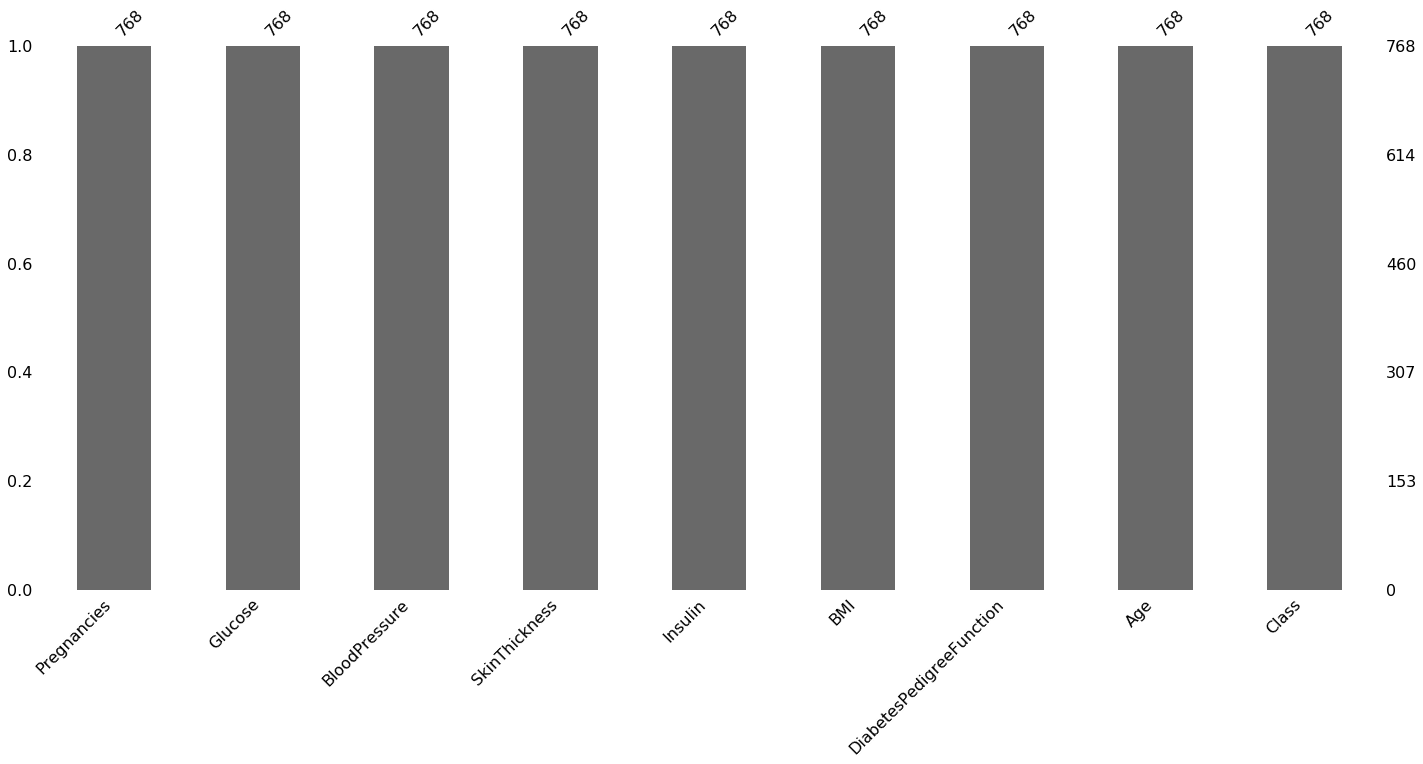

In [181]:
p=msno.bar(dfn)

0    500
1    268
Name: Class, dtype: int64


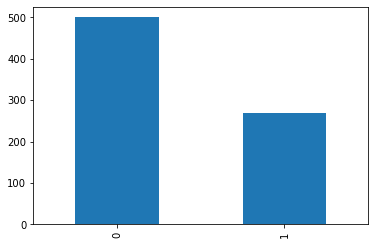

In [182]:
## ANALISANDO A PROPORÇÃO ENTRE RESULTADOS DA VARIÁVEL DE ESTUDO/A SER PREDITA

color_wheel = {1: "r", 
               2: "b"}
colors = dfn["Class"].map(lambda x: color_wheel.get(x + 1))
print(dfn.Class.value_counts())
p=dfn.Class.value_counts().plot(kind="bar")

### O número de não-portadores de diabetes é quase o dobro de portadores de diabetes, o que significa que este dataset pode não ser o melhor para ser utilizado para treino de algoritmo.

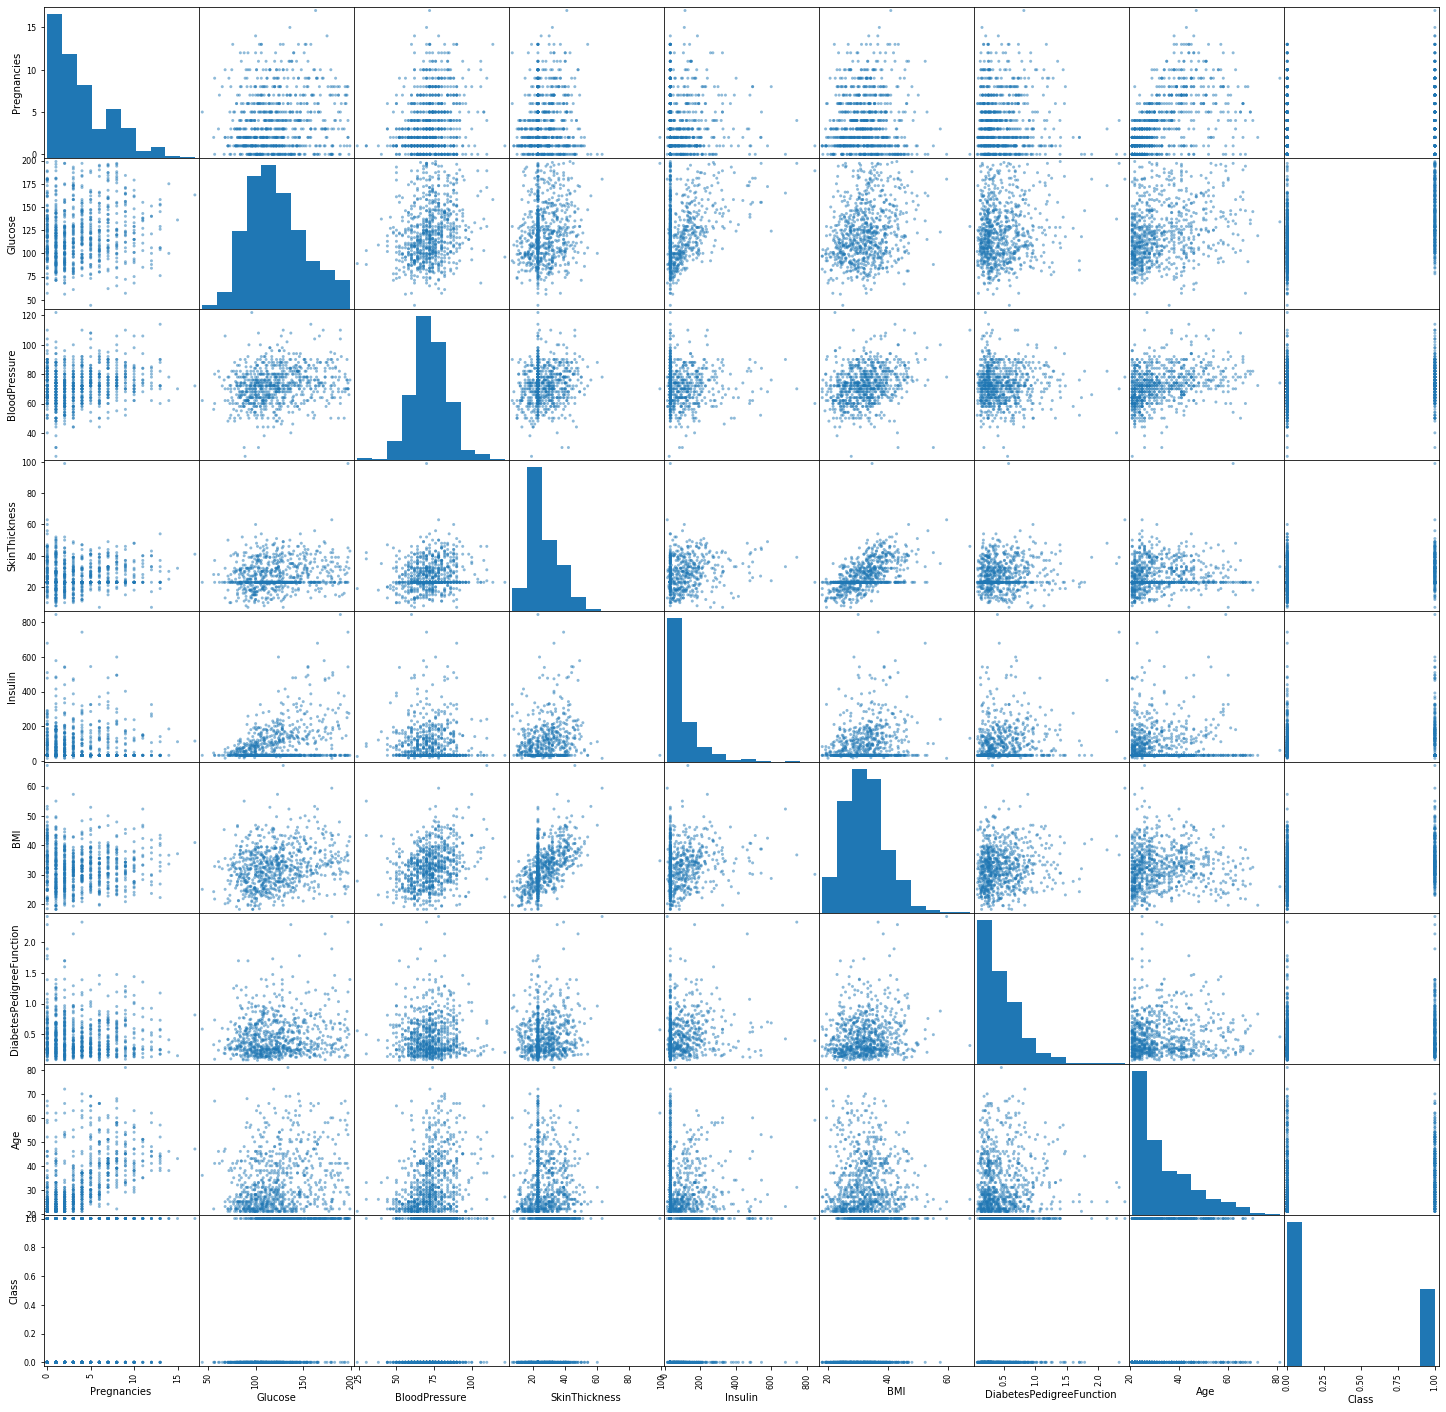

In [183]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(dfn,figsize=(25, 25))

C:\Users\cv\.conda\envs\aula2\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\cv\.conda\envs\aula2\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


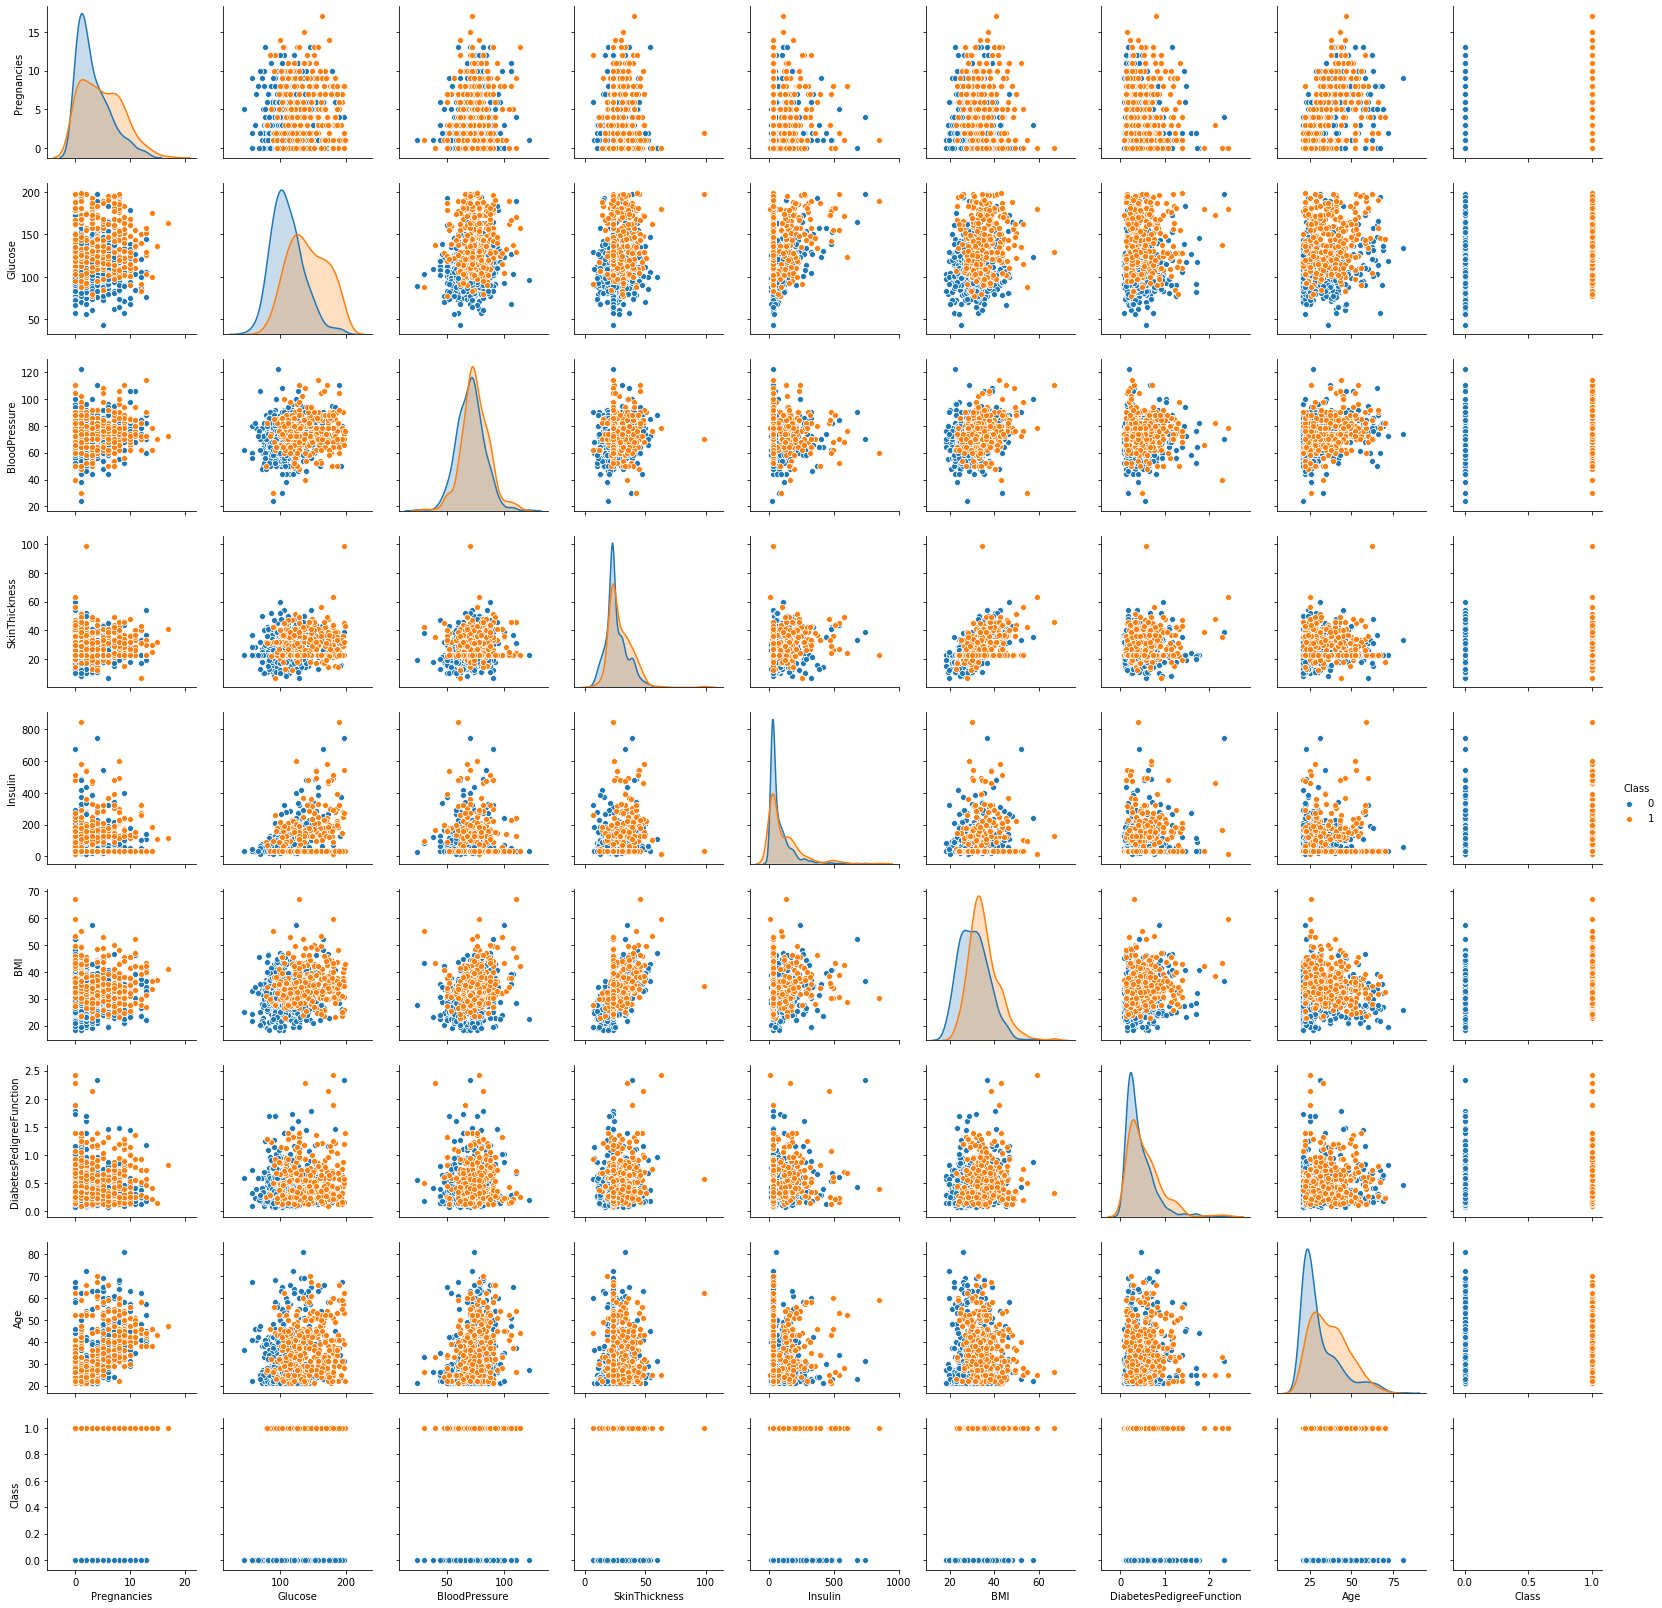

In [184]:
p=sns.pairplot(dfn, hue = 'Class')

### Heatmap com os valores do Coeficiente de Correlação de Pearson para o DF original

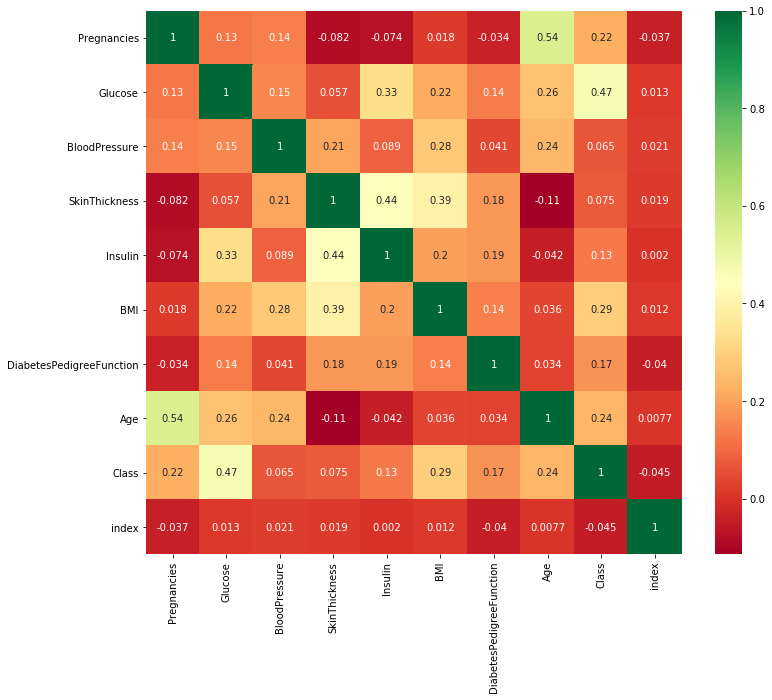

In [250]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

### Heatmap com os valores do Coeficiente de Correlação de Pearson para o DF Corrigido

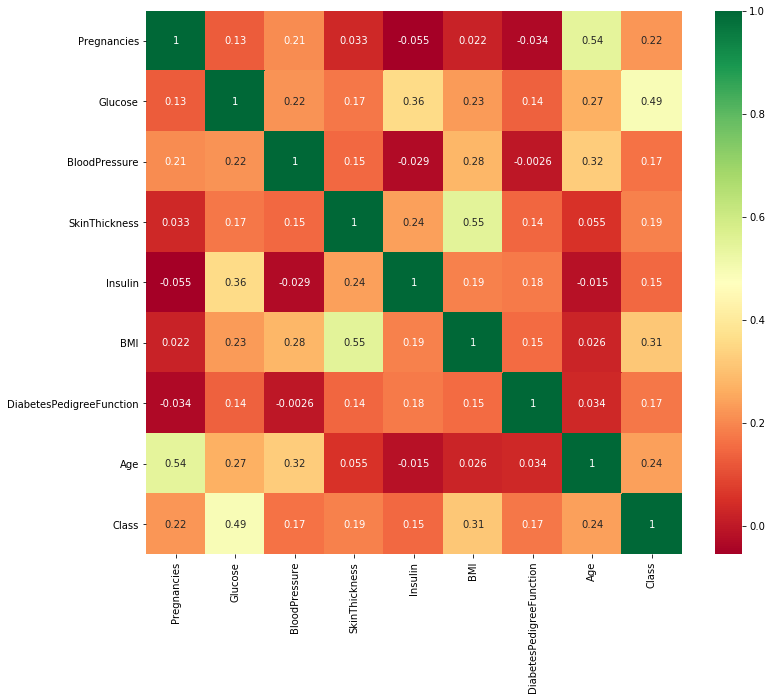

In [186]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(dfn.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

## Conforme o heatmap acima, o atributo que possui melhor correlação com a variável Class é a GLUCOSE.

## Agora procedemos com a normalização dos dados:

In [187]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(dfn.drop(["Class"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [188]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.844885,-1.206160,-0.529290,0.180566,-0.605827,-0.851551,-0.365061,-0.190672
1,-0.844885,-1.074651,-0.529290,-0.469981,-0.009668,-0.633239,-0.920763,-1.041549
2,0.342981,-0.186964,0.132495,-0.469981,-0.605827,-0.997092,-0.818079,-0.275760
3,1.827813,-0.219842,-0.011873,-0.469981,-0.605827,0.414661,-1.020427,-0.360847
4,0.046014,-0.384228,1.621513,-0.469981,-0.605827,0.749406,-0.848280,-0.275760


In [189]:
y = dfn.Class
y.head()

1     0
3     0
5     0
7     0
10    0
Name: Class, dtype: int64

## Dividindo a base em treino e teste

In [3]:
###############   STRATYF mantém a mesma proporção nos datasets de treino e teste da variável a ser predita   ############

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle = True, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_test.describe().T

NameError: name 'X' is not defined

In [ ]:
Implementar o modelo de regressao SGD, naive bayes e regressao logistica para identificar casos de doenca do coracao (CHD) com os dados da base

### Treinando o modelo do regressor KNN

In [227]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,50):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [228]:
### TESTE USANDO O MESMO DATASET DE TREINO    #####################
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


## Visualização dos resultados

In [251]:
## USANDO DATASET de TESTE
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 83.62068965517241 % and k = [13, 14, 15]


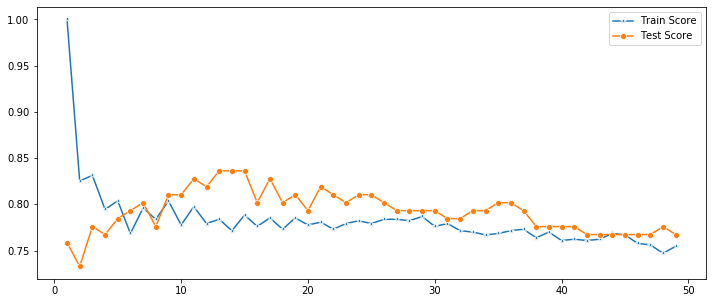

In [255]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,50),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,50),test_scores,marker='o',label='Test Score')

## Usando o valor de KNN que retornou o melhor resultado

In [256]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(13)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8362068965517241

C:\Users\cv\.conda\envs\aula2\lib\site-packages\mlxtend\plotting\decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


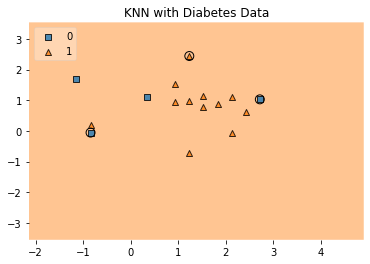

In [257]:
from mlxtend.plotting import plot_decision_regions

value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

In [259]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,73,3,76
1,16,24,40
All,89,27,116


Text(0.5, 15.0, 'Predicted label')

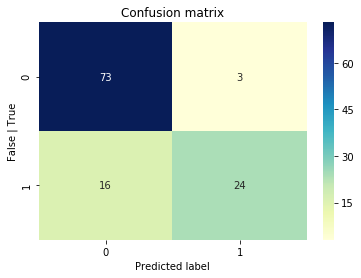

In [261]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('False | True')
plt.xlabel('Predicted label')

#TP | FN
#FP | TN

In [244]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88        76
           1       0.89      0.60      0.72        40

    accuracy                           0.84       116
   macro avg       0.85      0.78      0.80       116
weighted avg       0.84      0.84      0.83       116



In [245]:
from sklearn.metrics import accuracy_score

y_train_pred = knn.predict(X_train)
print("Accuracy Score", accuracy_score(y_test, y_pred)*100)

Accuracy Score 83.62068965517241


In [246]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

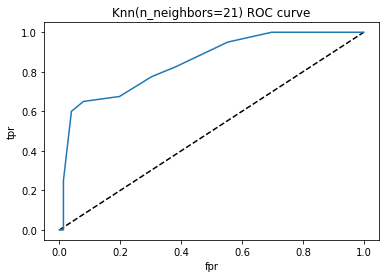

In [264]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=21) ROC curve')
plt.show()

In [248]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8493421052631579

In [249]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7787284610814023
Best Parameters: {'n_neighbors': 19}
